In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

nb_samples = 800

X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=2.2, random_state=1000)

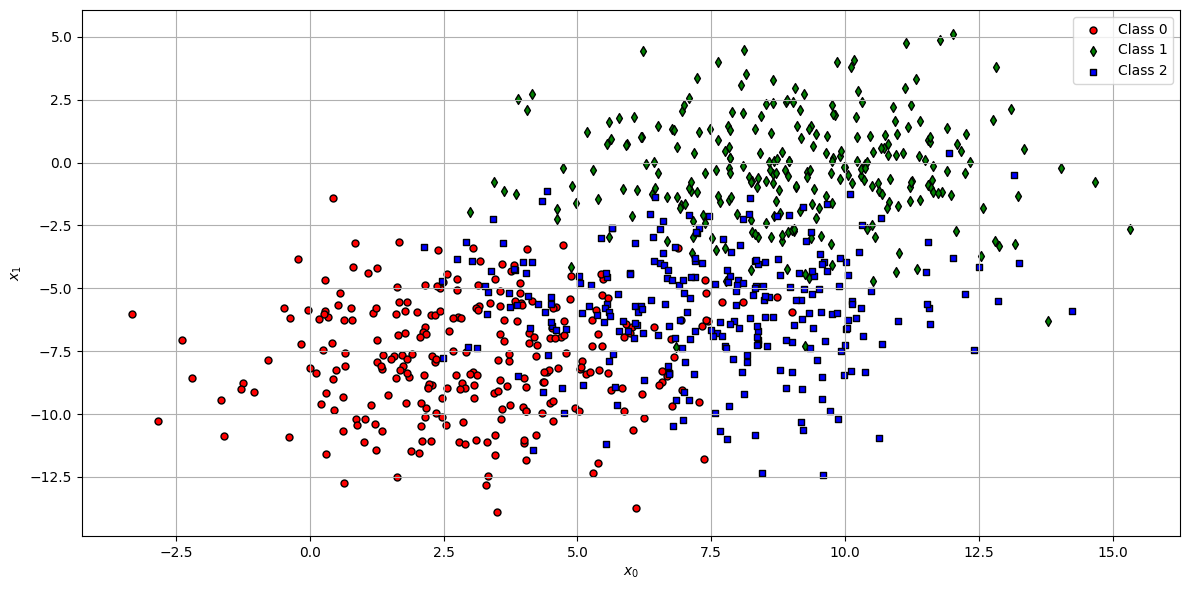

In [13]:
# Define colors and markers for each class
colors = ['red', 'green', 'blue']
markers = ['o', 'd', 's']  # circle, diamond, square
labels = ['Class 0', 'Class 1', 'Class 2']

# Create the plot
plt.figure(figsize=(12, 6))

for i in range(3):  # loop over each class
    plt.scatter(X[Y == i, 0], X[Y == i, 1],
                c=colors[i],
                marker=markers[i],
                label=labels[i],
                edgecolor='black',
                s=25)

# Add legend and labels
plt.legend()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, max_iter=1000, random_state=1000)
gm.fit(X)
labels = gmm.predict(X)

/Users/hugo/repos/ai/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hugo/repos/ai/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hugo/repos/ai/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


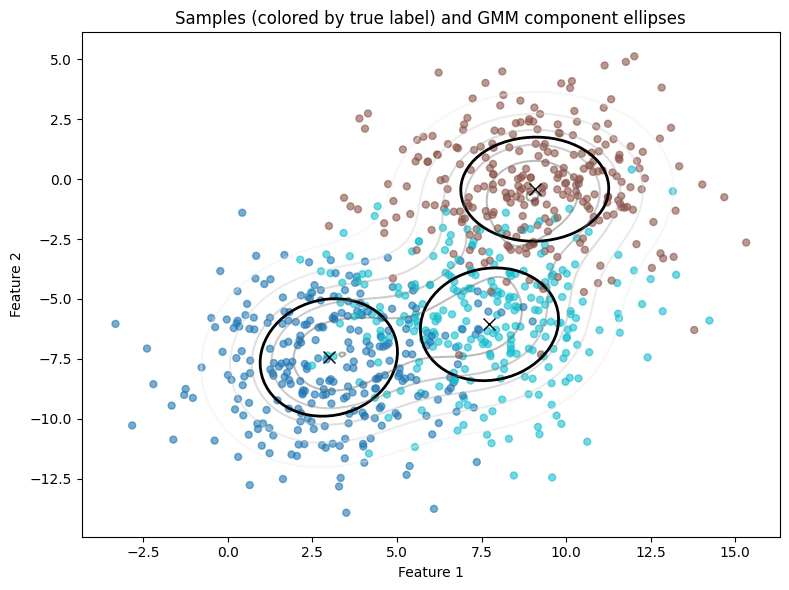

In [15]:
def plot_gmm_ellipses(gmm, ax):
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        cov = gmm.covariances_[i]
        # get eigenvalues and eigenvectors for the covariance
        vals, vecs = np.linalg.eigh(cov)
        # sort by largest eigenvalue
        order = vals.argsort()[::-1]
        vals = vals[order]
        vecs = vecs[:, order]
        # angle of ellipse (degrees)
        angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
        # width and height are 2*sqrt(eigvals) scaled for 1 std
        width, height = 2 * np.sqrt(vals)
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor='k', facecolor='none', lw=2, linestyle='-')
        ax.add_patch(ell)
        # plot component mean
        ax.plot(mean[0], mean[1], 'kx', markersize=8)

# plotting
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='tab10', s=25, alpha=0.6, label='samples')
ax.set_title('Samples (colored by true label) and GMM component ellipses')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plot_gmm_ellipses(gmm, ax)

# optional: show GMM predicted labels as transparent contour background
# create grid for contour
x = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 200)
y = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack([xx.ravel(), yy.ravel()])
probs = np.exp(gmm.score_samples(grid)).reshape(xx.shape)
ax.contour(xx, yy, probs, levels=6, cmap='Greys', alpha=0.4)

plt.tight_layout()
plt.show()